In [1]:

import os


# Verify the current directory
current_dir = os.getcwd()

# Change to the desired directory
os.chdir(f"{current_dir}/Depth-Anything-V2")

current_dir = os.getcwd()

print(f"Current directory: {current_dir}")

Current directory: /root/Depth-SoM/Depth-Anything-V2


In [2]:
import os
import io
from PIL import Image as Image_PIL
import shutil
from datasets import load_dataset, Dataset, Image
from tqdm import tqdm
from huggingface_hub import login
from dotenv import load_dotenv

import os

load_dotenv()  # Load environment variables from .env file

from huggingface_hub import login


# --- Configuration ---

hf_token = os.getenv("HF_TOKEN")
login(hf_token)

hf_user = "Rajarshi-Roy-research"
# dataset_name = "ADE20K_OVSEG_Som"
dataset_name = "Som_bench_refcocog_refseg"
commit_message = "Updating dataset with VLM"
img_cols = ["image"]
image_to_process = "image"

# --- Helper Functions ---
def save_image_from_bytes(image_data, idx, image_folder):
    
    if isinstance(image_data,list):
        image_data = image_data[0]
        
    """Saves an image from byte data or PIL Image and returns the saved file path."""
    print(image_data,type(image_data))
    try:
        if isinstance(image_data, Image_PIL.Image):
            image = image_data
        elif isinstance(image_data, bytes):
            image = Image_PIL.open(io.BytesIO(image_data))
        else:
            print(f"Unsupported image data type at row {idx}: {type(image_data)}")
            return None

        image_path = os.path.join(image_folder, f"image_{idx}.jpg")
        image.save(image_path, format="JPEG")
        print(f"✅ Saved: {image_path}")
        return image_path
    except Exception as e:
        print(f"❌ Error saving image at row {idx}: {e}")
        return None




def push_to_hugging_face(ds, img_cols, hf_user, dataset_name, commit_message, hf_token, private=False):
    """Pushes the dataset to the Hugging Face Hub."""
    for img_col in img_cols:
        ds = ds.cast_column(img_col, Image())

    try:
        ds.push_to_hub(
            repo_id=f"{hf_user}/{dataset_name}",
            commit_message=commit_message,
            token=hf_token,
            private=private,
        )
        print(f"✅ Dataset successfully uploaded: {hf_user}/{dataset_name}")
    except Exception as e:
        print(f"❌ Error pushing to Hugging Face Hub: {e}")



# --- Main Script ---
# Clean up existing image folder
for img_col in img_cols:
    if os.path.exists(img_col):
        shutil.rmtree(img_col)
    os.makedirs(img_col)

# Load dataset
ds = load_dataset(f"{hf_user}/{dataset_name}",revision="a8196e2e83ea9c13ae9d3ed421c0edc27cc4a420")
# ds = load_dataset(f"{hf_user}/{dataset_name}")
print(ds["train"][:1])

#Process images using the dataset object directly.
for img_col in img_cols:
    print(img_col)
    ds = ds.map(
        lambda example, idx: {img_col: save_image_from_bytes(example[img_col], idx, img_col)},
        with_indices=True,
        num_proc=1 # Adjust as needed for performance
    )
    

# push_to_hugging_face(ds, img_cols, hf_user, dataset_name, commit_message, hf_token)

#Process and add captions (This part remains unchanged as it doesn't directly interact with image data)
try:
    #This section is not needed anymore since we are working directly with the dataset.
    #df = pd.read_csv("updated_dataset.csv") 
    pass
except FileNotFoundError:
    pass

# ds["train"][:1]

README.md:   0%|          | 0.00/1.70k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/12.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/100 [00:00<?, ? examples/s]

{'id': ['000000007601'], 'image': [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1205x800 at 0x7F6ECD001660>], 'obj_text': [['A black cow that is only half visible standing close to a fully visible cow.', 'The far right black cow.; cow on the far right who is barely visible; cow butt 3:00; cow barely showing; cow far right; far right cow butt', 'A cow standing in high grass wearing an ear tag with the number 342.; Cow with a number 312 on a tag on its ear.; yellow tag in ear; cow with tag; Cow with yellow tag; middle cow; big cow yellow tag; center cow']], 'ref_ids': [[3, 1, 2]], 'json_data': [[{'ref_id': 3, 'text': ['A black cow that is only half visible standing close to a fully visible cow.']}, {'ref_id': 1, 'text': ['The far right black cow.', 'cow on the far right who is barely visible', 'cow butt 3:00', 'cow barely showing', 'cow far right', 'far right cow butt']}, {'ref_id': 2, 'text': ['A cow standing in high grass wearing an ear tag with the number 342.', 'Cow with a 

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1205x800 at 0x7F6ECBDB78E0> <class 'PIL.JpegImagePlugin.JpegImageFile'>
✅ Saved: image/image_0.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1067x800 at 0x7F6ECBDB7CA0> <class 'PIL.JpegImagePlugin.JpegImageFile'>
✅ Saved: image/image_1.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1067x800 at 0x7F6ECBDB7AF0> <class 'PIL.JpegImagePlugin.JpegImageFile'>
✅ Saved: image/image_2.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1333x681 at 0x7F6ECBDB7D30> <class 'PIL.JpegImagePlugin.JpegImageFile'>
✅ Saved: image/image_3.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x1202 at 0x7F6ECBDB7D00> <class 'PIL.JpegImagePlugin.JpegImageFile'>
✅ Saved: image/image_4.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1202x800 at 0x7F6ECBDB7CD0> <class 'PIL.JpegImagePlugin.JpegImageFile'>
✅ Saved: image/image_5.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1333x760 at 0x7F6ECBD

In [41]:
import torch
from PIL import Image
import requests
from transformers import AutoProcessor, LlavaForConditionalGeneration

model_path = "zzxslp/som-llava-v1.5-13b-hf"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LlavaForConditionalGeneration.from_pretrained(model_path).to(device)
processor = AutoProcessor.from_pretrained(model_path)



Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 270.00 MiB. GPU 0 has a total capacity of 44.45 GiB of which 32.62 MiB is free. Process 1858922 has 44.41 GiB memory in use. Of the allocated memory 44.14 GiB is allocated by PyTorch, and 18.55 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [42]:
import torch
torch.cuda.empty_cache()
torch.cuda.ipc_collect()


In [43]:
!nvidia-smi

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Tue Mar 11 14:17:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A40                     On  |   00000000:85:00.0 Off |                    0 |
|  0%   28C    P0             71W /  300W |   45483MiB /  46068MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [44]:
del variable_name  # Delete specific tensors
gc.collect()
torch.cuda.empty_cache()


NameError: name 'variable_name' is not defined

In [38]:
processor.patch_size = 14

In [39]:
# image

In [40]:
prompt = "USER: <image>\nWhat's the content of the image? ASSISTANT:"
url = "https://www.ilankelman.org/stopsigns/australia.jpg"
image = Image.open(requests.get(url, stream=True).raw).convert('RGB') #Ensure image is in RGB format for compatibility
inputs = processor(text=prompt, images=image, return_tensors="pt").to("cuda")

# Generate
with torch.no_grad(): #Added for efficiency, as no gradients are needed during inference.
    generate_ids = model.generate(**inputs, max_new_tokens=20)
output = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]
print (output)


KeyboardInterrupt: 

In [37]:
# 28224/576

In [34]:
# 112896/576

In [35]:
# 196.0/49.0

In [36]:
# 196.0**0.5

In [3]:
import re
import ast

def extract_list_from_string(text):
    """
    Extracts a list from a string by finding the first occurrence of square brackets.

    Parameters:
        text (str): The input string containing a Python list.

    Returns:
        list: Extracted list if found, otherwise an empty list.
        
    """
    match = re.search(r"\[.*?\]", text, re.DOTALL)
    if match:
        try:
            return ast.literal_eval(match.group(0))  # Safely parse the list
        except (SyntaxError, ValueError):
            return []
    return []

# Example usage
text = "```python\n[3, 1, 2]\n```"
print(extract_list_from_string(text))  # Output: [3, 1, 2]
print(type(extract_list_from_string(text)))  # Output: [3, 1, 2]


[3, 1, 2]
<class 'list'>


In [ ]:
from transformers import (
    PaliGemmaProcessor,
    PaliGemmaForConditionalGeneration,
)
from transformers.image_utils import load_image
import torch

model_id = "google/paligemma2-10b-pt-224"

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg"
image = load_image(url)
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.bfloat16, device_map="auto", use_auth_token=True).eval()
processor = PaliGemmaProcessor.from_pretrained(model_id, use_auth_token=True)


In [16]:
import httpx
import base64
import ast

def text_to_list(text):
    return ast.literal_eval(text)





def get_prompt(obj_list):
  prompt=f"""I have labeled a bright numeric ID at the center for each visual object in the image. \n\nPlease tell me the IDs for:"""

  for i in obj_list:
    prompt += f"\n-{i}\n"

  prompt+= "\nPlease, correctly label the above bulleted component and properly give answer in the form of just a python list format accoriding to the order of objects asked according to the image"
  # prompt+= "\nPlease, correctly label the above bulleted component and properly give answer in the form of just a python list format accoriding to the order of objects asked\nAnswer Example:`[1,2,4..]`"

  # print(prompt)
  return prompt

def get_response(prompt,img_path):
  
  if isinstance(img_path, Image_PIL.Image):
    image = img_path
  
  elif isinstance(img_path, str):
    image = Image_PIL.open(img_path)
  # print(prompt)
  
  conversation = [
      {

        "role": "user",
        "content": [
            {"type": "text", "text": prompt},
            {"type": "image"},
          ],
      },
  ]
  prompt = processor.apply_chat_template(conversation, add_generation_prompt=True)

    
  inputs = processor(images=image, text=prompt, return_tensors='pt').to(0, torch.float16)

  output = model.generate(**inputs, max_new_tokens=200, do_sample=False)
  

  # Decode and print the output
  response = processor.decode(output[0][2:], skip_special_tokens=True)
  
  print("response",response)
  print(extract_list_from_string(response))


def get_prediction(index, ds):

  img_path = ds[index]['image']
  obj_list = ds[index]['obj_text']

  prompt = get_prompt(obj_list)
  #print(prompt)
  return get_response(prompt,img_path)



In [22]:
get_prediction(2, ds['train'])

response ER:  
I have labeled a bright numeric ID at the center for each visual object in the image. 

Please tell me the IDs for:
-an orange cat stuffed animal; The teddy bear that is as large as the baby.

-The group of stuffed animals the child is facing.; Infant feed her teddy bear

Please, correctly label the above bulleted component and properly give answer in the form of just a python list format accoriding to the order of objects asked according to the image ASSISTANT: [0.0, 0.0, 0.28, 0.99]
[0.0, 0.0, 0.28, 0.99]


In [ ]:
# 

In [34]:
len(list_)

1

In [9]:
index=2

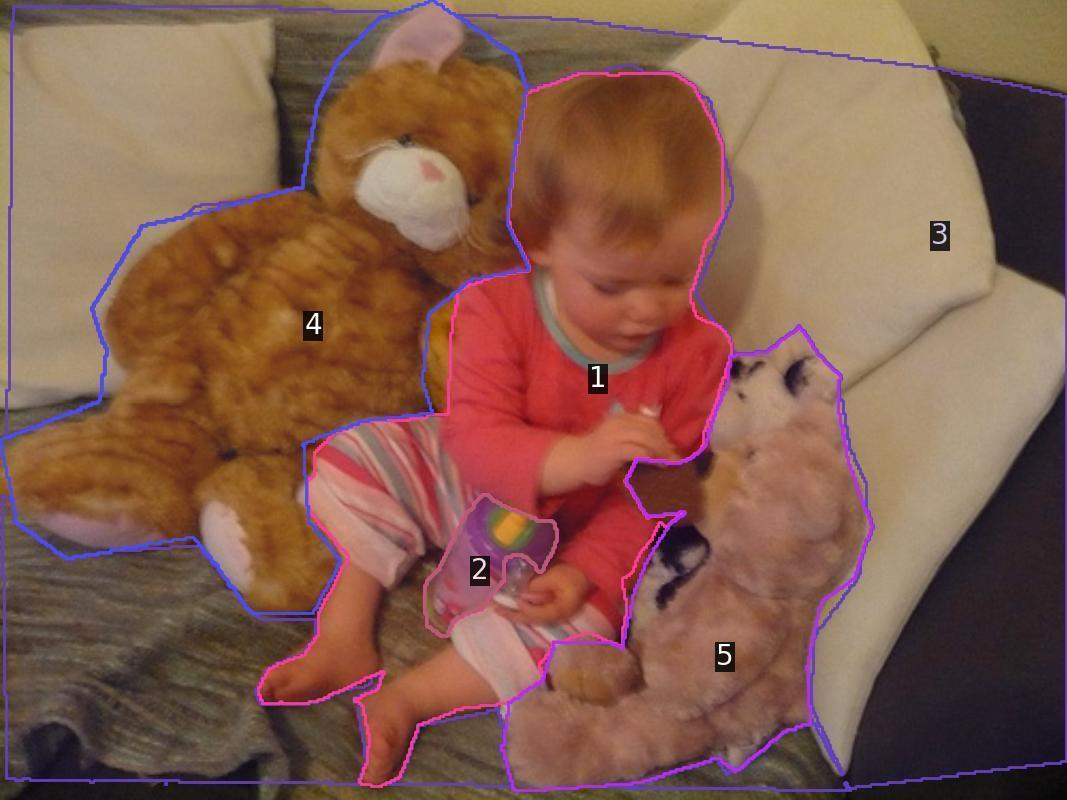

In [15]:
img_path = ds["train"][index]['image']
obj_list = ds["train"][index]['obj_text']
img_path

In [25]:
image = img_path
# Leaving the prompt blank for pre-trained models
prompt = """<image> ;
You are a label indicator; saying what component of image is referring to what ID
I have labeled a bright numeric ID at the center for each visual object in the image. 

Please tell me the IDs for:
-an orange cat stuffed animal; The teddy bear that is as large as the baby.

-The group of stuffed animals the child is facing.; Infant feed her teddy bear

Please, correctly label the above bulleted component. """

model_inputs = processor(text=prompt, images=image, return_tensors="pt").to(torch.float16).to(model.device)

model_inputs = processor(text=prompt, images=image, return_tensors="pt").to(torch.bfloat16).to(model.device)
input_len = model_inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)
    generation = generation[0][input_len:]
    decoded = processor.decode(generation, skip_special_tokens=True)
    print(decoded)

-The baby's teddy bear


In [21]:
model_inputs = processor(text=prompt, images=image, return_tensors="pt").to(torch.bfloat16).to(model.device)

with torch.backends.cuda.sdp_kernel(enable_flash=True, enable_math=False, enable_mem_efficient=True):
    with torch.inference_mode():
        generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)


/usr/lib/python3.10/contextlib.py:103: FutureWarning: `torch.backends.cuda.sdp_kernel()` is deprecated. In the future, this context manager will be removed. Please see `torch.nn.attention.sdpa_kernel()` for the new context manager, with updated signature.
  self.gen = func(*args, **kwds)


In [23]:
generation = generation[0][input_len:]
decoded = processor.decode(generation, skip_special_tokens=True)
print(decoded)

-The group of stuffed animals the child is facing.; Infant feed her teddy bear


In [18]:

url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg"
image = load_image(url)


# Leaving the prompt blank for pre-trained models
prompt = ""
model_inputs = processor(text=prompt, images=image, return_tensors="pt").to(torch.bfloat16).to(model.device)
input_len = model_inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)
    generation = generation[0][input_len:]
    decoded = processor.decode(generation, skip_special_tokens=True)
    print(decoded)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.


car


In [19]:
model.device

device(type='cuda', index=0)

In [5]:

hf_token = os.getenv("HF_TOKEN")
login(hf_token)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


2025-03-10 16:20:37.026620: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-10 16:20:37.037553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741623637.052240    2541 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741623637.056733    2541 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-10 16:20:37.072967: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/92.6k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/4.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

/root/Depth-SoM/.venv/lib/python3.10/site-packages/transformers/processing_utils.py:1057: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/424 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/34.6M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text. For this call, we will infer how many images each text has and add special tokens.
/root/Depth-SoM/.venv/lib/python3.10/site-packages/torch/_inductor/compile_fx.py:194: UserWarning: TensorFloat32 tensor cores for float32 matrix multiplication available but not enabled. Consider setting `torch.set_float32_matmul_precision('high')` for better performance.
  warnings.warn(


car


In [6]:
print(processor.decode(output[0][2:], skip_special_tokens=True))


ER:  
What are these? ASSISTANT: These are two cats lying on a pink couch.


In [2]:
# !pip install 'accelerate>=0.26.0'

  Using cached accelerate-1.4.0-py3-none-any.whl.metadata (19 kB)
Using cached accelerate-1.4.0-py3-none-any.whl (342 kB)
